# Solución de la tarea 10

**NOTA IMPORTANTE**: en este notebook utilicé indistintamente $\frac{dx}{dt}$ y $\dot{x}$. Ambas representan la derivada respecto al tiempo de la posición. Una es notación de Newton y otra es notación de Leibniz. 

<div style="text-align:justify">En esta tarea se les pide resolver una ecuación diferencial de manera numérica utilizando el método de Euler. Los métodos numéricos nos proporcionan soluciones aproximadas a problemas que son demasiado complejos como para ser resueltos analíticamente. Ustedes ya han implementado alguno (la vez que obtuvimos el área de un conjunto de integrales). En esta ocasión, tenemos que resolver una ecuación diferencial. Entiendo que muchos de ustedes no estén familiarizados con las ecuaciones diferenciales. Este es un [video](https://www.youtube.com/watch?v=p_di4Zn4wz4) (está algo largo, veánlo un día que tengan tiempo) de un canal de Youtube que me gusta mucho que creo que les puede ayudar a entender un poco qué es una ecuación diferencial.  </div>

<div style="text-align:justify">Empecemos por recordar cómo es el sistema físico que estamos estudiando. Probablemente, en su curso de física contemporánea ya vieron un oscilador armónico como una masa $M$ pegada a un resorte con una constante de estiramiento $k$. Recordemos que la ley de Hooke la podemos escribir como $F=-kx$ y la segunda ley de Newton como $F=\frac{dp}{dt}=\frac{d(mv)}{dt}=m \frac{dv}{dt}= m \frac{d^2 x}{dt}=m\ddot{x}$. Si hacemos el diagrama de cuerpo libre, podemos ver que ambas fuerzas son iguales y obtendremos las siguiente ecuación diferencial:</div>

$$\frac{d^{2} x}{d t^{2}}+\frac{k x}{m}=0$$ (Los invito a hacer el álgebra para obtenerla.)

La ecuación anterior es la ecuación diferencial asociada al movimiento armónico simple. Un sistema mecánico que puede ser modelado por la ecuación diferencial anterior es el siguiente.

<img src="b.gif">

Sin embargo, la tenemos más difícil, pues además nuestro oscilador armónico es **forzado** y **amortiguado**. ¿Qué significa esto?

Que sea amortiguado significa simplemente que algo está ejerciendo una fuerza contraria a su movimiento (lo está frenando). Lo más común es que esta fuerza sea la fricción. No voy a poner la deducción de la ecuación, pues lo van a ver detalladamente en mecánica vectorial y en mecánica analítica, pero es algo más o menos así:

$$\frac{\mathrm{d}^{2} x}{\mathrm{d} t^{2}}+2 \zeta \omega_{0} \frac{\mathrm{d} x}{\mathrm{d} t}+\omega_{0}^{2} x=0 $$

El sistema físico que modela esta ecuación es el mismo que la primera ecuación, pero aquí sí hay fricción. Esto en un laboratorio se ve más o menos [así](https://www.youtube.com/watch?v=HRcjtVa1LfM)

Ya se empieza a parecer a nuestro problema ¿no creen?

Sólo nos falta el término forzado. Que el oscilador sea forzado, quiere decir que hay algo que está ejerciendo una fuerza en la dirección del movimiento de nuestra masa. Cuando le agregamos la fuerza que se propone en la tarea, la ecuación de movimiento de nuestro sistema queda justo como está en la tarea. 

$$m \ddot{x}(t)=-k x(t)-\alpha \dot{x}(t)+\beta \cos (\omega t)$$

(perdón que no se las deduzca desde el principio, pero de verdad es mucha mucha talacha y lo van a ver en otros cursos)

Si lo pensamos como un sistema mecánico, podemos pensar que hay una masa (una caja) colgando de una pared a través de un resorte y un amortiguador, que está siendo movida de arriba a abajo por algo. Hice este dibujo del sistema mecánico que espero les parezca interesante. 

<img src="a.png">

Resolver la ecuación diferencial del sistema, significa que vamos a encontrar una funcion $x(t)$ que va a describir el movimiento de la caja en función del tiempo. Siginifica, en términos generales, que vamos a saber cómo se mueve la caja del dibujo. 

Si alguno se inclina más por la teoría, este [sujeto](https://www.youtube.com/watch?v=LbVL5O_bG9w) resuelve la ecuación de forma analítica.

Empecemos con la solución: 

Lo primero que tenemos que hacer es identificar a qué corresponde cada uno de los términos de nuestra ecuación diferencial: 

$$\begin{equation}
\underbrace{m \ddot{x}}_{\text {aceleración }}+\underbrace{\alpha \dot{x}}_{\text {amortiguamiento }}+\underbrace{k x}_{\text {fuerza restitutiva}}=\underbrace{\beta \cos (\omega t)}_{\text {fuerza externa}}
\end{equation}$$

Insertamos los valores que da la tarea que son $m=k=1$, $\alpha=2$ y $\beta=\omega=3$:

$$\ddot{x}+2\dot{x}+x=3cos(3t)$$ 

Las ecuaciones diferenciales de segundo orden tienen las siguiente forma:

$$\begin{equation}
\ddot{x}+A \dot{x}+B x=C
\end{equation} $$

Hagamos el siguiente cambio de variable: $$\begin{equation}
\begin{aligned} x &=y_{1} \\ \dot{x} &=y_{2}=\dot{y}_{1} \end{aligned}
\end{equation} $$

De las definiciones anteriores, se sigue lo siguiente: 
$$\begin{equation}
\ddot{x}=\dot{y}_{2}
\end{equation} $$

Entonces, podemos reescribir la ecuación diferencial de segundo orden como:

$$ \begin{equation}
\dot{y}_{2}+A y_{2}+B y_{1}=C
\end{equation}$$ 

Entonces, nos quedamos con un sistema de ecuaciónes diferenciales de primer orden acopladas. 

$$ \begin{equation}
\begin{aligned} \dot{y_{1}} &=y_{2} \\ \dot{y}_{2} &=C-B y_{1}-A y_{2} \end{aligned}
\end{equation}$$

Ahora, reemplazando nuestros valores en la ecuación tenemos que: 

$$ \begin{equation}
\begin{aligned} \dot{y_{1}} &=y_{2} \\ \dot{y}_{2} &=3cos(3t)- y_{1}-2 y_{2} \end{aligned}
\end{equation}$$

Ahora, regresemos a nuestras variables originales:

$$\dot{x}=v$$ y $$\dot{v}=3cos(3t)-x-2v$$

El método de Euler consistirá simplemente en aplicar la siguiente fórmula iterativa:

$$\begin{equation}
Y_{t+h}=Y_{t}+f\left(x_{t}, Y_{t}\right) \cdot h
\end{equation}$$

Entonces, para resolver nuestra ecuación diferencial, tenemos que implementar las siguientes fórmulas iterativas:

$$x_i=x_i+hv_i$$ y $$v_i=v_i+3cos(3t)-x_i-2v_i$$



Lamento si mi intento de explicación no es muy claro. Esto lo entenderán mejor cuando lleven su curso de ecuaciones diferenciales. 🙃

# El Código

Ahora sí! El código: para $h=0.1$

In [10]:
x0=5 #condición inicial de la posición
v0=0 #condición inicial de la velocidad
t=0 #tiempo inicial
v=v0 #velocidad al momento del inicio, la queremos igual a la velocidad inicial 
x=x0 #posición al momento del inicio, la queremos igual a la posición inicial
tf=(4*pi)/3 #tiempo final
h=0.1 #tamaño del paso
while t<=tf #el bucle se va a ejecutar desde el tiempo cero hasta el tiempo (4*pi)/3
    println(t,'|',x,'|',v)#tiempo, posición y velocidad
    x=x+(v*h) #implementación de las ecuaciones de arriba
    v=v+(h*(3*cos(3*t)- x -(2*v)))
    t=t+h #aumento del paso
end

0|5|0
0.1|5.0|-0.2
0.2|4.98|-0.37139905326231826
0.30000000000000004|4.942860094673769|-0.543804567604328
0.4|4.888479637913336|-0.7374086273935967
0.5|4.814738775173976|-0.9626934530892729
0.6|4.718469429865048|-1.2207805449576123
0.7|4.596391375369287|-1.5044242019109446
0.7999999999999999|4.445948955178193|-1.799588088426532
0.8999999999999999|4.26599014633554|-2.087487600037153
0.9999999999999999|4.057241386331825|-2.3469358612680233
1.0999999999999999|3.8225478002050224|-2.5568012180150546
1.2|3.5668676784035167|-2.6983716732250547
1.3|3.297030511081011|-2.757427914588389
1.4000000000000001|3.021287719622172|-2.7258507948929704
1.5000000000000002|2.748702640132875|-2.602629146329874
1.6000000000000003|2.4884397254998873|-2.3941860294431216
1.7000000000000004|2.2490211225555754|-2.1140012407782205
1.8000000000000005|2.0376209984777534|-1.7815697696564572
1.9000000000000006|1.8594640215121077|-1.420794355093586
2.0000000000000004|1.717384586002749|-1.0579601072233955
2.1000000000000

El código para $h=0.01$ (noten que es el mismo, sólo cambió el tamaño de h)

In [14]:
x0=5 #condición inicial de la posición
v0=0 #condición inicial de la velocidad
t=0 #tiempo inicial
v=v0 #velocidad al momento del inicio, la queremos igual a la velocidad inicial 
x=x0 #posición al momento del inicio, la queremos igual a la posición inicial
tf=(4*pi)/3 #tiempo final
h=0.01 #tamaño del paso
while t<=tf #el bucle se va a ejecutar desde el tiempo cero hasta el tiempo (4*pi)/3
    println(t,'|',x,'|',v) #tiempo, posición y velocidad
    println(v)
    x=x+(v*h) #implementación de las ecuaciones de arriba
    v=v+(h*(3*cos(3*t)- x -(2*v)))
    t=t+h #aumento del paso
end

0|5|0
0
0.01|5.0|-0.02
-0.02
0.02|4.9998|-0.03961149898753037
-0.03961149898753037
0.03|4.999403885010124|-0.05886729165982488
-0.05886729165982488
0.04|4.998815212093525|-0.0777995159572038
-0.0777995159572038
0.05|4.9980372169339535|-0.09643963873178327
-0.09643963873178327
0.060000000000000005|4.997072820546635|-0.11481844182453269
-0.11481844182453269
0.07|4.9959246361283896|-0.13296600856568228
-0.13296600856568228
0.08|4.994594976042733|-0.15091171071307152
-0.15091171071307152
0.09|4.993085858935602|-0.16868419584260524
-0.16868419584260524
0.09999999999999999|4.9913990169771765|-0.18631137520454819
-0.18631137520454819
0.10999999999999999|4.989535903225131|-0.20382041205894036
-0.20382041205894036
0.11999999999999998|4.987497699104542|-0.22123771050295535
-0.22123771050295535
0.12999999999999998|4.985285321999512|-0.23858890480255332
-0.23858890480255332
0.13999999999999999|4.982899432951486|-0.2558988492402977
-0.2558988492402977
0.15|4.980340444459083|-0.27319160849071333
-0.

# Tablas en Latex de los datos

**anexas en un pdf**

Ahora hay que hacer las tablas en latex. Esto es una pesadilla. Les puedo platicar un truco por si algún día tienen que hacerlo de nuevo. Saquen individualmente sus resultados. Copien y peguen en excel y utilicen un "macro" llamado excel2latex. Eso les va a permitir sacar todos los resultados a una tabla en latex con unos cuantos clicks sin necesidad de copiar individualmente los números. Pero con suerte, nunca van a necesitarlo.

Edit: lo anterior lo escribí antes de hacerlo. Sacar los datos y ponerlos en una tabla de latex es **horrible** Si algún día se vuelven a topar con un problema similar, me escriben y les paso un programa que hice para hacer eso, pero de verdad espero que nunca tengan que hacerlo. Las tablas se las puse en un pdf aparte. 

# Por último, las gráficas

En lo que hayan hecho las gráficas está bien. Pudieron haber utilizado GNUplot o excel. Yo las voy a hacer aquí mismo haciendo una modificación pequeña a nuestro programa.

In [1]:
A=[]#los datos los guardo en estos arreglos
B=[]
C=[]
x0=5 #condición inicial de la posición
v0=0 #condición inicial de la velocidad
t=0 #tiempo inicial
v=v0 #velocidad al momento del inicio, la queremos igual a la velocidad inicial 
x=x0 #posición al momento del inicio, la queremos igual a la posición inicial
tf=(4*pi)/3 #tiempo final
h=0.1 #tamaño del paso
while t<=tf #el bucle se va a ejecutar desde el tiempo cero hasta el tiempo (4*pi)/3
    push!(A,t)
    push!(B,x)
    push!(C,v)
    println(t,'|',x,'|',v)#tiempo, posición y velocidad
    x=x+(v*h) #implementación de las ecuaciones de arriba
    v=v+(h*(3*cos(3*t)- x -(2*v)))
    t=t+h #aumento del paso
end

0|5|0
0.1|5.0|-0.2
0.2|4.98|-0.37139905326231826
0.30000000000000004|4.942860094673769|-0.543804567604328
0.4|4.888479637913336|-0.7374086273935967
0.5|4.814738775173976|-0.9626934530892729
0.6|4.718469429865048|-1.2207805449576123
0.7|4.596391375369287|-1.5044242019109446
0.7999999999999999|4.445948955178193|-1.799588088426532
0.8999999999999999|4.26599014633554|-2.087487600037153
0.9999999999999999|4.057241386331825|-2.3469358612680233
1.0999999999999999|3.8225478002050224|-2.5568012180150546
1.2|3.5668676784035167|-2.6983716732250547
1.3|3.297030511081011|-2.757427914588389
1.4000000000000001|3.021287719622172|-2.7258507948929704
1.5000000000000002|2.748702640132875|-2.602629146329874
1.6000000000000003|2.4884397254998873|-2.3941860294431216
1.7000000000000004|2.2490211225555754|-2.1140012407782205
1.8000000000000005|2.0376209984777534|-1.7815697696564572
1.9000000000000006|1.8594640215121077|-1.420794355093586
2.0000000000000004|1.717384586002749|-1.0579601072233955
2.1000000000000

**La siguiente línea tarda un poco en compilar**

In [4]:
using Pkg
Pkg.add("Plots")
using Plots#llamo a la libreria para graficar

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 %=======>                                 ]  16.1 %32.1 %>                    ]  48.3 % [==========================>              ]  64.4 %]  80.4 %=====================================>   ]  90.7 % Resolving package versions...
 Installed Requires ─────────── v0.5.2
 Installed FixedPointNumbers ── v0.6.1
 Installed Plots ────────────── v0.27.0
 Installed OrderedCollections ─ v1.1.0
 Installed ColorTypes ───────── v0.8.0
 Installed Contour ──────────── v0.5.1
 Installed DataStructures ───── v0.17.5
 Installed GR ───────────────── v0.42.0
 Installed Parsers ──────────── v0.3.9
 Installed DataAPI ──────────── v1.1.0
 Installed Missings ─────────── v0.4.3
 Installed IterTools ────────── v1.2.0
 Installed SortingAlgorithms ── v0.3.1
 Installed Measures ─────────── v0.3.0
 Installed StaticArrays ─────── v0.

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1186


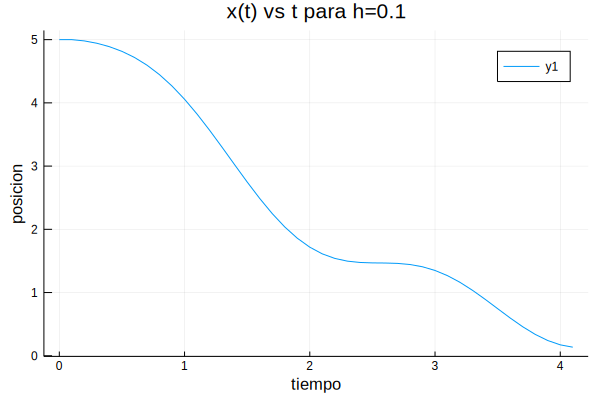

In [5]:
plot(A,B, xlabel="tiempo", ylabel="posicion",title="x(t) vs t para h=0.1") #Esta función grafica el arreglo donde
                                                                           #guardé los valores del tiempo vs el 
                                                                           #arreglo donde guardé los valores de posicion

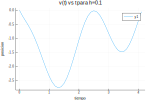

In [23]:
plot(A,C, xlabel="tiempo", ylabel="posicion",title="v(t) vs t para h=0.1")

In [25]:
A1=[]#los datos los guardo en estos arreglos
B1=[]
C1=[]
x0=5 #condición inicial de la posición
v0=0 #condición inicial de la velocidad
t=0 #tiempo inicial
v=v0 #velocidad al momento del inicio, la queremos igual a la velocidad inicial 
x=x0 #posición al momento del inicio, la queremos igual a la posición inicial
tf=(4*pi)/3 #tiempo final
h=0.01 #tamaño del paso
while t<=tf #el bucle se va a ejecutar desde el tiempo cero hasta el tiempo (4*pi)/3
    push!(A1,t)
    push!(B1,x)
    push!(C1,v)
    println(t,'|',x,'|',v)#tiempo, posición y velocidad
    x=x+(v*h) #implementación de las ecuaciones de arriba
    v=v+(h*(3*cos(3*t)- x -(2*v)))
    t=t+h #aumento del paso
end

0|5|0
0.01|5.0|-0.02
0.02|4.9998|-0.03961149898753037
0.03|4.999403885010124|-0.05886729165982488
0.04|4.998815212093525|-0.0777995159572038
0.05|4.9980372169339535|-0.09643963873178327
0.060000000000000005|4.997072820546635|-0.11481844182453269
0.07|4.9959246361283896|-0.13296600856568228
0.08|4.994594976042733|-0.15091171071307152
0.09|4.993085858935602|-0.16868419584260524
0.09999999999999999|4.9913990169771765|-0.18631137520454819
0.10999999999999999|4.989535903225131|-0.20382041205894036
0.11999999999999998|4.987497699104542|-0.22123771050295535
0.12999999999999998|4.985285321999512|-0.23858890480255332
0.13999999999999999|4.982899432951486|-0.2558988492402977
0.15|4.980340444459083|-0.27319160849071333
0.16|4.977608528374176|-0.29049044853406053
0.17|4.974703623888835|-0.30781782811888914
0.18000000000000002|4.971625445607645|-0.32519539078321524
0.19000000000000003|4.968373491699813|-0.34264395744363435
0.20000000000000004|4.9649470521253765|-0.36018351956114736
0.21000000000000

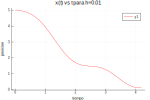

In [31]:
plot(A1,B1, xlabel="tiempo", ylabel="posicion",title="x(t) vs t para h=0.01",color="red")

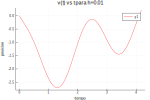

In [30]:
plot(A1,C1, xlabel="tiempo", ylabel="posicion",title="v(t) vs t para h=0.01",color="red")

## Acabamos!

Esta tarea estuvo muy difícil. No se preocupen de más si no les salió o hubo partes que se les complicaron mucho. Este ejercicio estuvo al nivel de uno de física computacional, que es una materia de los últimos semestres. Creo que esta fue la última tarea del curso (creo). Espero que se la hayan pasado bien y les haya nacido un poco la curiosidad de ver qué se puede hacer con las computadoras y cómo lo pueden aplicar a la carrera. Sigan echándole ganas a acabar bien el semestre :)

<img src="meme2.jpg">